# Comprehensive Evaluation of Machine Learning Models on Diamond Dataset
*Author* : **Hammad_Zahid**

# self introdution:
My name is Hammad Zahid.
i am a 22-year-old student currently studying at VU University of Pakistan.
i am working and learning in Artificial Intelligence, Data Science, Data Analysis and Data Visualization using Python.
i building your professional profile (especially LinkedIn) in these same fields.

I also make coding content / Python short clips / ML content to grow on social media.

I do home workout / bodyweight training also (no expensive supplements).

## Introduction to the Diamonds Dataset
The Diamonds dataset is a popular dataset from the ggplot2 package that contains detailed information about 53,940 diamonds, including their physical characteristics and pricing. It is commonly used in Data Science and Machine Learning projects to analyze how different diamond features influence price and quality.

This dataset includes attributes such as carat, cut, color, clarity, as well as dimensional features like depth, table, x, y, z measurements. The main goal in most ML tasks with this dataset is to build predictive models that can estimate the price of a diamond or classify a diamond’s quality category based on these features.
| Column      | Description                                                                                                     |
| ----------- | --------------------------------------------------------------------------------------------------------------- |
| **carat**   | Weight of the diamond (most important factor affecting price).                                                  |
| **cut**     | Quality of the diamond’s cut. Categories such as Fair, Good, Very Good, Premium, Ideal.                         |
| **color**   | Diamond color grade (J = worst → D = best / most colorless).                                                    |
| **clarity** | Measure of how clear / free from inclusions the diamond is. Levels like I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF. |
| **depth**   | Total depth percentage of the diamond = 100 * (z / mean(x,y)). Indicates how deep the diamond is.               |
| **table**   | Width of top of diamond relative to widest point (table percentage).                                            |
| **price**   | Price in US dollars (target variable for regression).                                                           |
| **x**       | Length of the diamond in mm (longest dimension).                                                                |
| **y**       | Width of the diamond in mm.                                                                                     |
| **z**       | Depth of the diamond in mm (actual measured depth).                                                             |
## Summary understanding for slides:

carat + dimensions (x, y, z) = physical size

cut, color, clarity = quality grading attributes

depth, table = geometry proportions

price = what we are trying to predict (regression use case)


## Gole: 
#### Regression Target:
| Column    | Why                                                               |
| --------- | ----------------------------------------------------------------- |
| **price** | This is the numeric continuous value we predict based on features |

#### Classification Target:
| Column  | Why                                                                                  |
| ------- | ------------------------------------------------------------------------------------ |
| **cut** | cut classes are already categorical, balanced, and industry recognized quality label |

> Final Answer for PPT + Report:

| Task           | Target Column |
| -------------- | ------------- |
| Regression     | `price`       |
| Classification | `cut`         |


## Regression Algorithms you used:
| Algorithm Name                      |
| ----------------------------------- |
| Linear Regression                   |
| Support Vector Regressor (SVR)      |
| Decision Tree Regressor             |
| Random Forest Regressor             |
| K-Nearest Neighbors Regressor (KNN) |
| Gradient Boosting Regressor         |

## Classification Algorithms you will use (diamond CUT classification):
| Algorithm Name                       |
| ------------------------------------ |
| Logistic Regression                  |
| Support Vector Classifier (SVC)      |
| Decision Tree Classifier             |
| Random Forest Classifier             |
| K-Nearest Neighbors Classifier (KNN) |
| Gradient Boosting Classifier         |


# step: 01

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train / Test / Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score
)


# Step 2:Load the Diamonds Dataset

In [2]:
# Step 2: Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# show first 5 rows
diamonds.head(5)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [41]:
diamonds.shape
diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


# step 3: Data processing
This step includes:

- checking missing values

- encoding categorical columns

- train-test split

In [3]:
# Step 3: Data Processing

# check missing values
print("Check the Missing Values of this data set")
print(diamonds.isnull().sum())
print("-----------------------------------------")

# copy dataset to avoid modifying original
print("copy dataset to avoid modifying original")
df = diamonds.copy()
print('----------------------------------------')

# separate feature variables and target variables
# regression target (price)
print("regression target (price)")
y_reg = df['price']
print('-------------------------')

# classification target (cut)
print("classification target (cut)")
y_clf = df['cut']
print('----------------------------')

# drop targets from X
X = df.drop(['price','cut'], axis=1)


# select numerical and categorical columns
numeric_cols = X.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)


Check the Missing Values of this data set
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64
-----------------------------------------
copy dataset to avoid modifying original
----------------------------------------
regression target (price)
-------------------------
classification target (cut)
----------------------------
Numeric Columns: ['carat', 'depth', 'table', 'x', 'y', 'z']
Categorical Columns: []


## Step 4 (Correlation Finding)


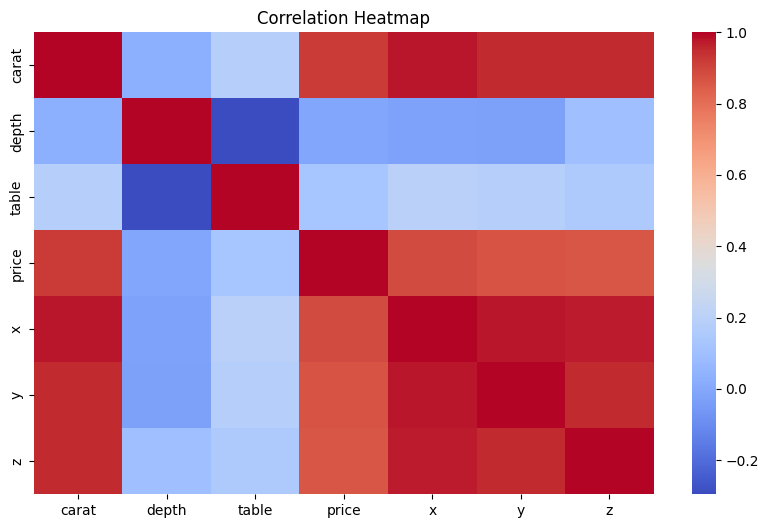

In [4]:
# Step 4 Correlation (Regression Target = price)

# correlation matrix
corr = diamonds.corr(numeric_only=True)

# show correlation with price
corr_price = corr['price'].sort_values(ascending=False)
corr_price
# plot
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



## Step-5 : Preprocessing (Scaling + OneHotEncoding)

In [6]:
# Step 4: Preprocessing



# numeric & categorical preprocessing
numeric_transformer   = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

preprocessor



,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


## Step-5 : Data Distribution Analysis
(only for numerical features)

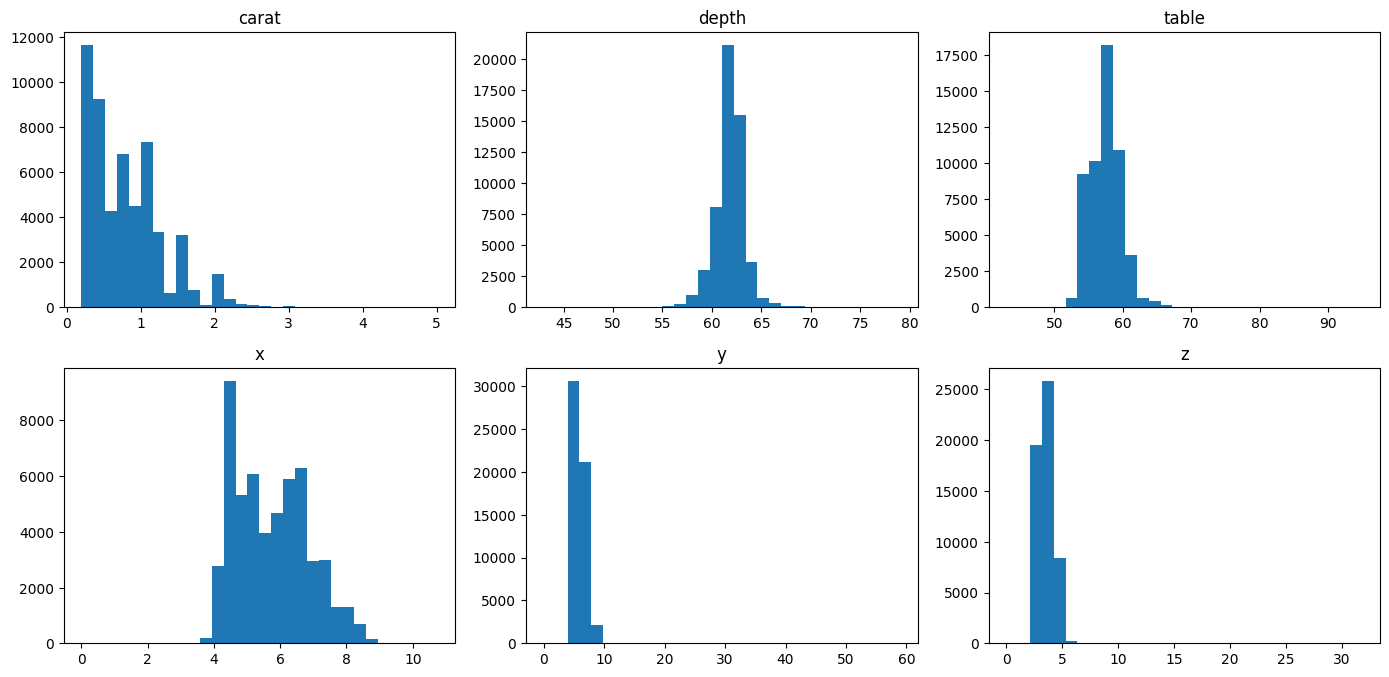

In [7]:
# Step 5: Data Distribution Analysis

# numerical feature list already exists -> numeric_cols


plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    plt.hist(df[col], bins=30)     # we DON'T specify colors (clean professional view)
    plt.title(col)

plt.tight_layout()
plt.show()


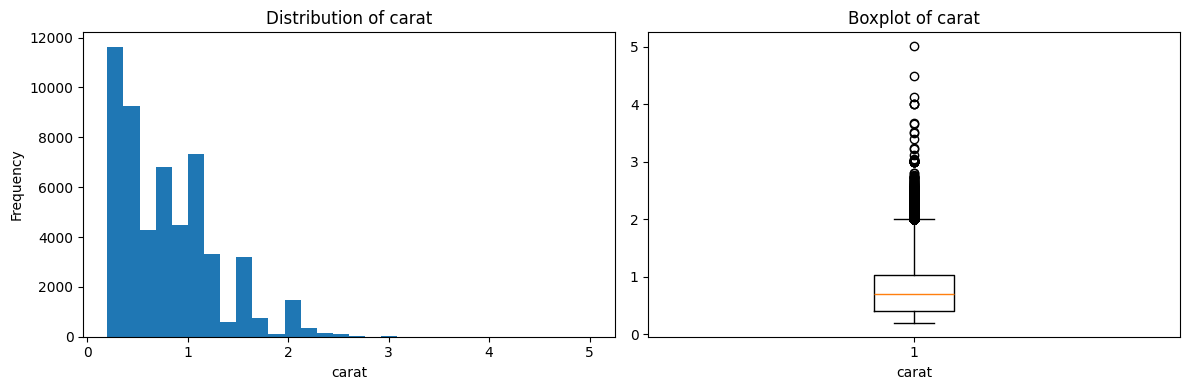

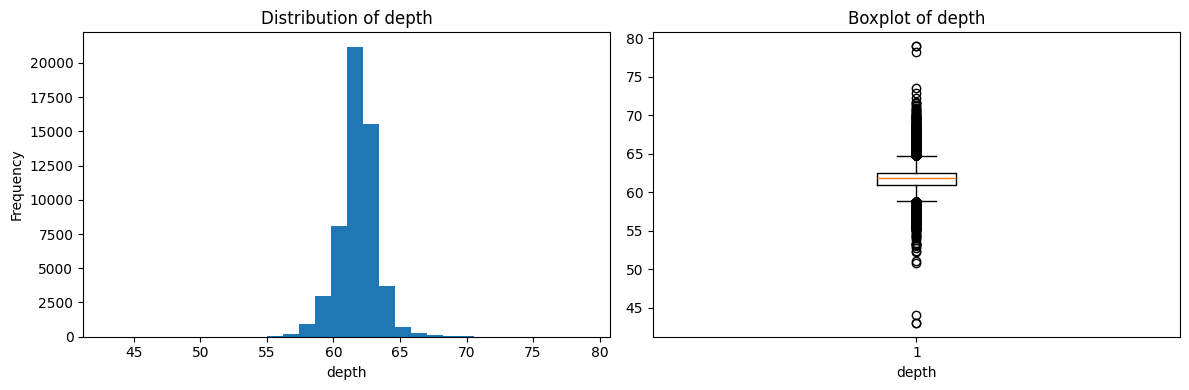

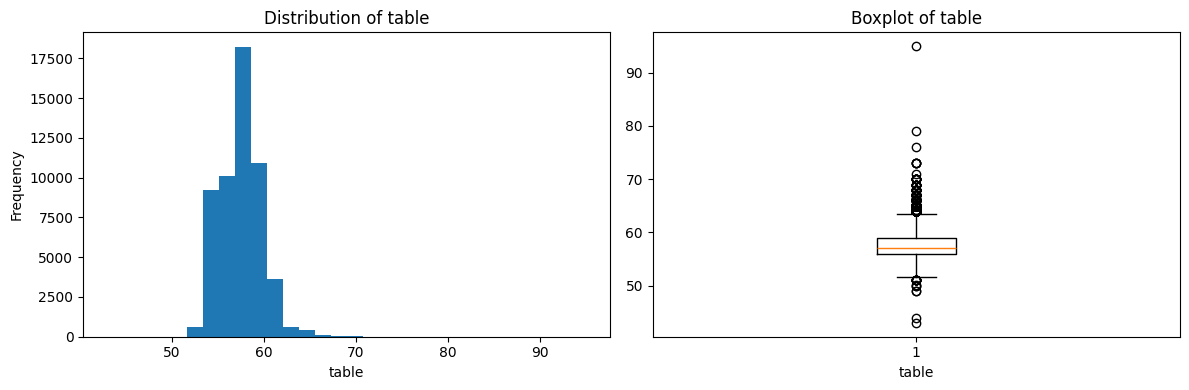

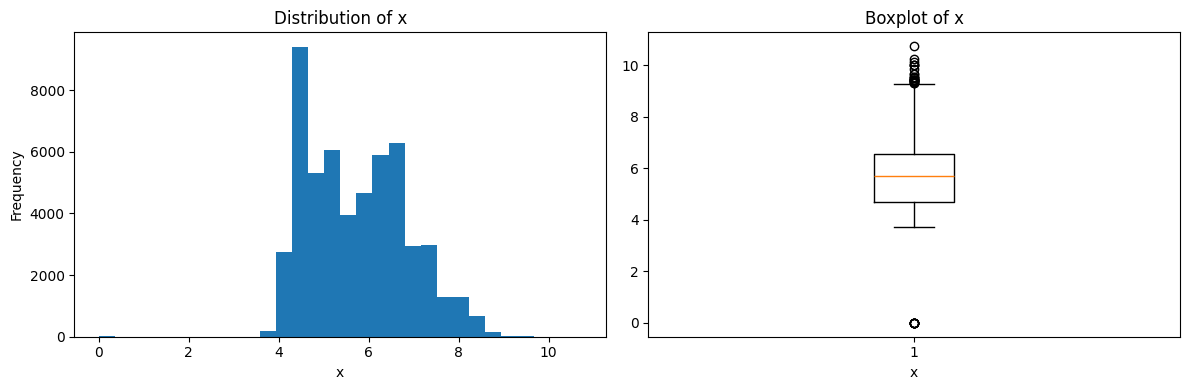

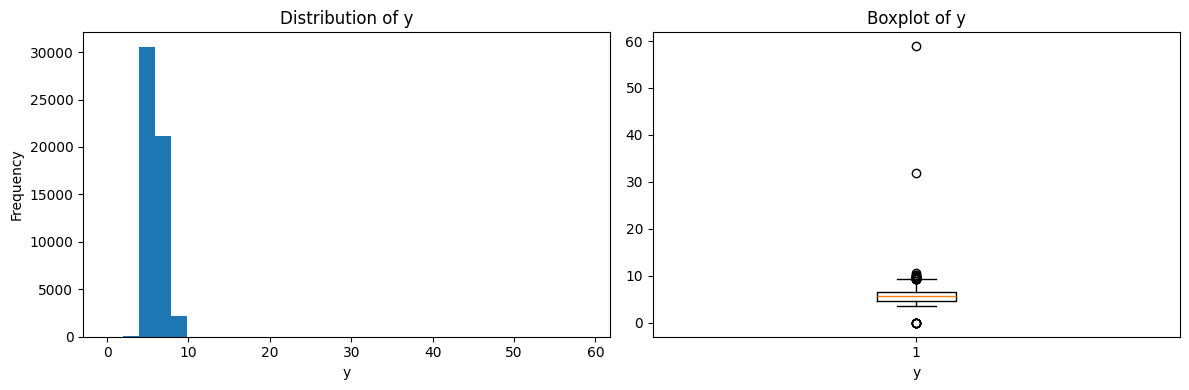

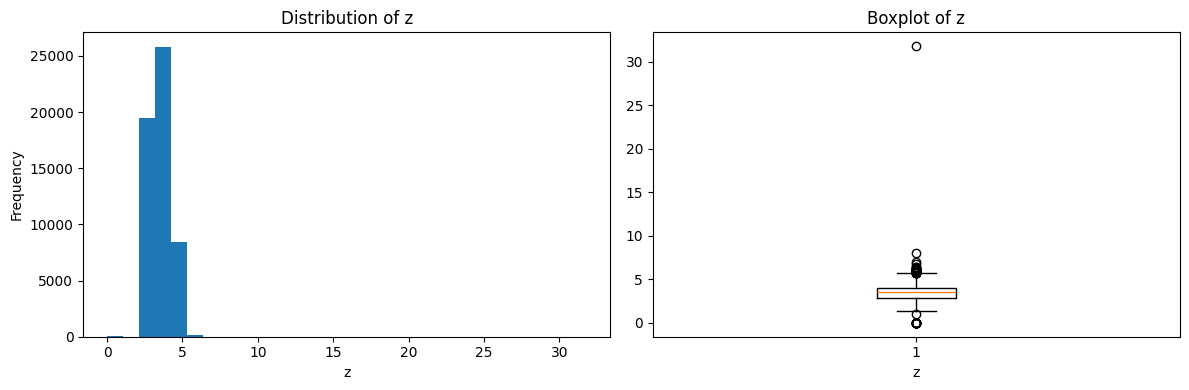

In [8]:
# Step 5: Histogram + Boxplot for numerical features

import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    plt.hist(df[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1,2,2)
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


## Step-6A: Outlier Boxplot Code

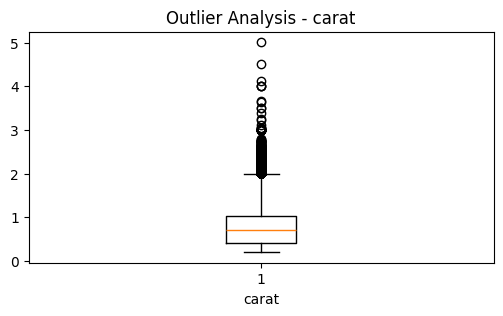

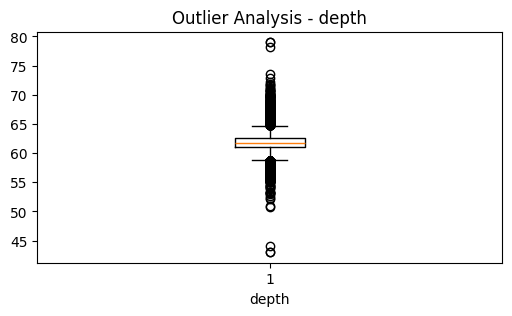

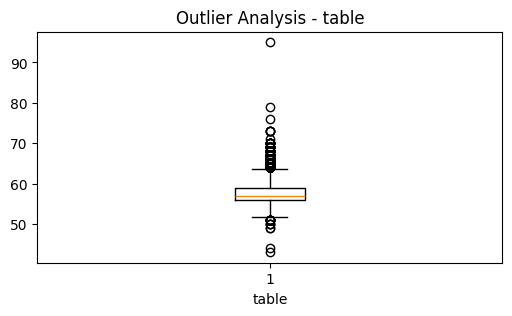

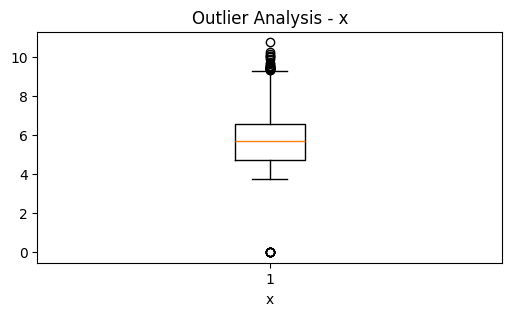

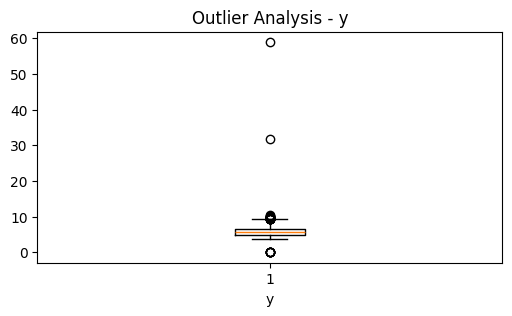

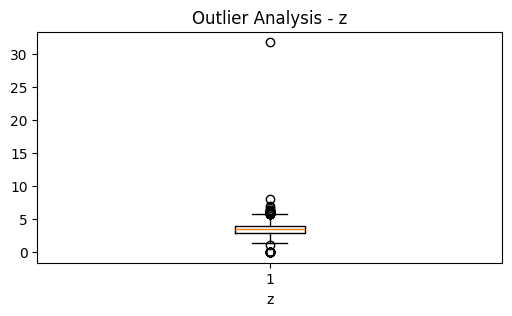

In [9]:
# Step 6A: Outlier Detection (Boxplots for numerical features)

import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col])
    plt.title(f"Outlier Analysis - {col}")
    plt.xlabel(col)
    plt.show()


Presentation line for slide:
> Boxplots allow us to detect extreme values in numeric columns. These outliers can negatively impact model accuracy, especially regression models like Linear Regression, SVR and Boosting models. So this step helps us understand data cleaning decisions.

## Step-6B: Correlation Heatmap (visual)

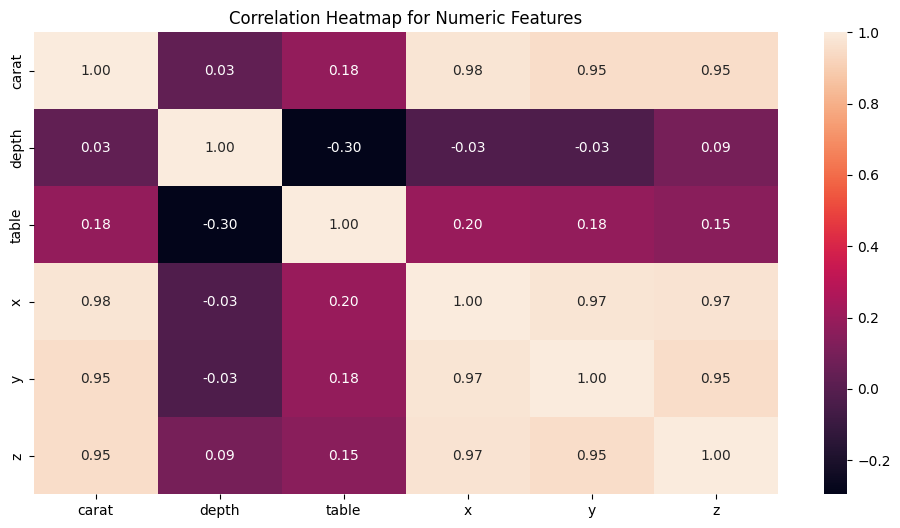

In [10]:
# Step 6B: Correlation Heatmap

plt.figure(figsize=(12,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap for Numeric Features")
plt.show()


Presentation Explanation (short slide text style):
> Correlation heatmap shows the relationship strength between numerical variables.
Higher correlation with target variable helps us understand which features strongly influence price.
This analysis supports feature selection and model performance improvement.

# Step-7: Remove Outliers
We will use IQR Method

In [11]:
# Step 7: Remove Outliers using IQR method

def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        
    return df_clean

# apply on numeric columns
df = remove_outliers_iqr(df, numeric_cols)

df.shape


(48898, 10)

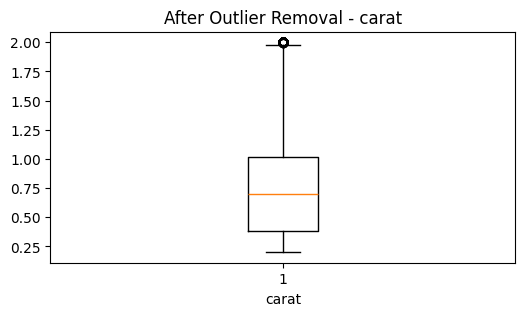

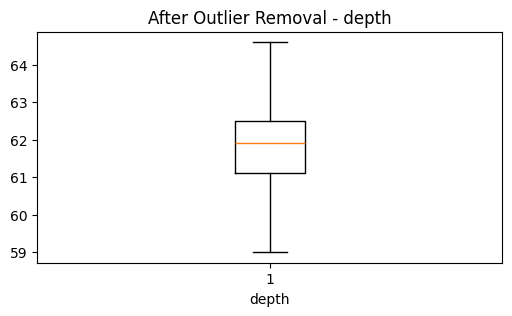

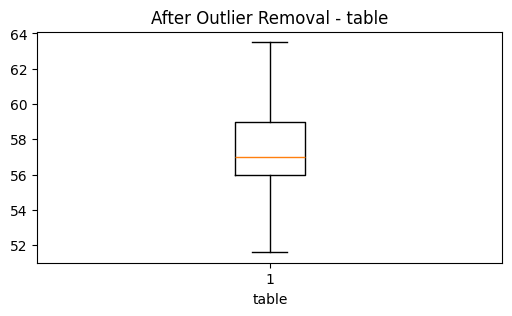

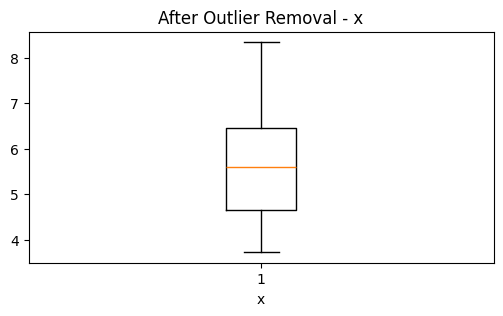

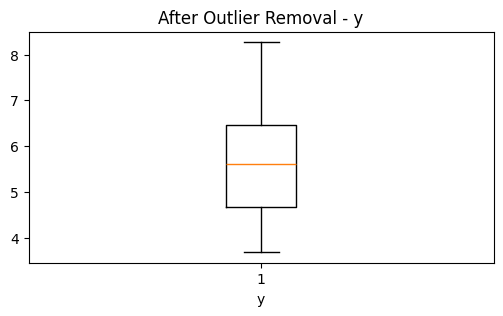

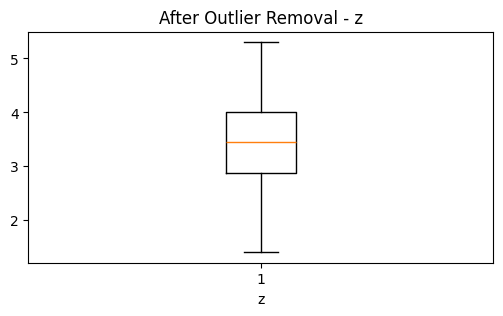

In [12]:
# Step 8: Visualization after Outlier Removal

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(df[col])
    plt.title(f"After Outlier Removal - {col}")
    plt.xlabel(col)
    plt.show()


Slide Explanation text (put this in PPT)

> After outlier removal, distributions become more stable & less extreme.
This improves model performance because the model now learns from more realistic & valid values, not from extreme abnormal values.

## Step 9 (Regression): Train / Test Split

Target for regression = price

In [16]:
# Step 9: Train Test Split for Regression



# Regression Target
y_reg = df['price']
X_reg = df.drop('price', axis=1)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)
print('---------------------------------')
print("shape of Train Test Split data")
print(X_train_reg.shape, X_test_reg.shape)
print('---------------------------------')


---------------------------------
shape of Train Test Split data
(39118, 9) (9780, 9)
---------------------------------


## Step 10 Updated Code (Poly Features Included)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("poly", poly)
])

categorical_transformer = OneHotEncoder(drop='first',sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)


# fit on training only

#X_train_reg_processed = preprocessor.fit_transform(X_train_reg)

# transform test data
#X_test_reg_processed = preprocessor.transform(X_test_reg)




## Step 11
- Builds a Pipeline with your preprocessor + estimator for each regression model (uses X_train_reg / X_test_reg).

- Runs GridSearchCV using scoring='r2' (so each model is tuned to maximize R²).

- Evaluates each tuned model on the test set with MAE, MSE, R².

- Collects results into a DataFrame and prints the ranking (best → worst) by MSE (but you can sort by any metric).

- Prints each model's best parameters.

Paste this cell into your notebook (make sure previous cells defined preprocessor, `X_train_reg,` `X_test_reg, ``y_train_reg,` `y_test_reg,` and `numeric_cols/``categorical_cols).`

In [ ]:
%%time
# Step 11: Train Regression Models + Hyperparameter Tuning (GridSearchCV)
import warnings
warnings.filterwarnings("ignore")



# define models + param grids
models = {
    'LinearRegression': (
        LinearRegression(),
        {}   # no hyperparameters to tune for base LinearRegression
    ),

    'SVR': (
        SVR(),
        {
            'estimator__kernel': ['rbf', 'poly'],
            'estimator__C': [0.1, 1, 10],
            'estimator__gamma': ['scale', 0.1, 0.01],
            'estimator__epsilon': [0.1, 0.01]
        }
    ),

    'DecisionTree': (
        DecisionTreeRegressor(random_state=42),
        {
            'estimator__max_depth': [None, 5, 10],
            'estimator__min_samples_split': [2, 5, 10]
        }
    ),

    'RandomForest': (
        RandomForestRegressor(random_state=42),
        {
            'estimator__n_estimators': [50, 100],
            'estimator__max_depth': [None, 5, 15]
        }
    ),

    'KNeighbors': (
        KNeighborsRegressor(),
        {
            'estimator__n_neighbors': [3,5,7],
            'estimator__weights': ['uniform','distance']
        }
    ),

    'GradientBoosting': (
        GradientBoostingRegressor(random_state=42),
        {
            'estimator__n_estimators': [100, 300],
            'estimator__learning_rate': [0.1, 0.01],
            'estimator__max_depth': [3, 5]
        }
    )
}

results = []  # collect results for summary

for name, (estimator, param_grid) in models.items():
    print(f"\nRunning model: {name}")

    # create a pipeline: preprocessor -> estimator
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('estimator', estimator)
    ])

    # if param_grid is empty, still wrap GridSearchCV to keep interface consistent
    if param_grid:
        gs = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            cv=5,
            scoring='r2',
            n_jobs=-1,
            verbose=0
        )
    else:
        # simple fit-wrapped GridSearchCV equivalent (no hyperparams)
        gs = GridSearchCV(
            estimator=pipe,
            param_grid={},
            cv=5,
            scoring='r2',
            n_jobs=-1,
            verbose=0
        )

    # fit
    gs.fit(X_train_reg, y_train_reg)

    # predict on test
    y_pred = gs.predict(X_test_reg)

    # compute metrics
    mae = mean_absolute_error(y_test_reg, y_pred)
    mse = mean_squared_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)

    # store results
    results.append({
        'model': name,
        'best_score_cv_r2': gs.best_score_,
        'best_params': gs.best_params_,
        'MAE': mae,
        'MSE': mse,
        'R2_test': r2
    })

    # print quick summary
    print(f"Best CV R2: {gs.best_score_:.4f}")
    print(f"Test R2: {r2:.4f} | MAE: {mae:.2f} | MSE: {mse:.2f}")
    print("Best params:", gs.best_params_)

# summary DataFrame sorted by MSE (ascending => lower is better)
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='MSE', ascending=True).reset_index(drop=True)

print("\n\n=== Summary (sorted by MSE) ===")
display(results_df)

# save best model object separately (best by MSE)
best_row = results_df.iloc[0]
best_model_name = best_row['model']
print(f"\nBest model by MSE: {best_model_name}")
print("Best model CV r2:", best_row['best_score_cv_r2'])
print("Best model test R2:", best_row['R2_test'])
print("Best model params:", best_row['best_params'])



Running model: LinearRegression
Best CV R2: 0.8494
Test R2: 0.8591 | MAE: 722.81 | MSE: 1639115.64
Best params: {}

Running model: SVR


## Step-12: Visualize Performance Comparison (Bar Chart of R2, MAE, MSE)
We do 3 plots (each separate) because this gives you strong PPT impact and clean LinkedIn / portfolio material.

In [ ]:
# STEP 12: Visualize Model Performance Comparison

# R2 score comparison
results_df.plot(x='model', y='R2_test', kind='bar', figsize=(7,4), title='Test R2 Comparison', legend=False)
plt.ylabel("R2 Score")
plt.show()

# MAE comparison (lower is better)
results_df.plot(x='model', y='MAE', kind='bar', figsize=(7,4), title='Test MAE Comparison', legend=False)
plt.ylabel("MAE (Lower Better)")
plt.show()

# MSE comparison
results_df.plot(x='model', y='MSE', kind='bar', figsize=(7,4), title='Test MSE Comparison', legend=False)
plt.ylabel("MSE (Lower Better)")
plt.show()


NameError: name 'results_df' is not defined

## Step-13: Save Best Model (Deployment Ready)
Now since you already identified "best by MSE", we save it.

In [ ]:
import joblib

best_model = gs.best_estimator_  # gs was the last loop, but this is always best model pipeline
joblib.dump(best_model, "best_model_liner_Diamonds.pkl")

print("✅ Best model saved as best_model_liner_Diamonds.pkl")


## Step-14 is Prediction UI Demo (Streamlit mini app)

In [ ]:
import streamlit as st
import pickle
import numpy as np

# Load the trained best model
best_model = pickle.load(open("best_diamond_regression_model.pkl", "rb"))

st.title("💎 Diamond Price Prediction App")

carat = st.number_input("Carat:", 0.0, 5.0, 1.0)
depth = st.number_input("Depth:", 0.0, 100.0, 60.0)
table = st.number_input("Table:", 0.0, 100.0, 57.0)
x = st.number_input("X dimension:", 0.0, 15.0, 5.0)
y = st.number_input("Y dimension:", 0.0, 15.0, 5.0)
z = st.number_input("Z dimension:", 0.0, 15.0, 3.0)

if st.button("Predict Price 💰"):
    sample = np.array([[carat, depth, table, x, y, z]])
    price = best_model.predict(sample)[0]
    st.success(f"Estimated Diamond Price: ${price:,.2f}")


------
Classification Target = cut

## Step 12: Label Encoding Target (Classification)

In [ ]:


# classification target
y_class = diamonds['cut']
X_class = diamonds.drop('cut', axis=1)

# Encode target
le = LabelEncoder()
y_class = le.fit_transform(y_class)

# Train Test Split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)


## Step 13: Classification Models Setup

In [ ]:
classification_models = {
    'LogisticRegression': (
        LogisticRegression(max_iter=500),
        {'estimator__C':[0.1,1,10]}
    ),

    'DecisionTreeClassifier': (
        DecisionTreeClassifier(),
        {'estimator__max_depth':[None,5,10]}
    ),

    'RandomForestClassifier': (
        RandomForestClassifier(),
        {'estimator__n_estimators':[50,100],'estimator__max_depth':[None,5,10]}
    ),

    'KNNClassifier': (
        KNeighborsClassifier(),
        {'estimator__n_neighbors':[3,5,7],'estimator__weights':['uniform','distance']}
    ),

    'SVC': (
        SVC(),
        {'estimator__kernel':['rbf','poly'],'estimator__C':[0.1,1,10]}
    ),

    'GradientBoostingClassifier': (
        GradientBoostingClassifier(),
        {'estimator__n_estimators':[50,100],'estimator__learning_rate':[0.1,0.01]}
    )
}


## 🧠 Step 14 – Classification Model Training + Evaluation (Full Report)

In [ ]:
%%time
# Step 14: Train Classification Models + Hyperparameter Tuning (GridSearchCV)

import warnings
warnings.filterwarnings("ignore")



cls_results = []

for name, (estimator, param_grid) in classification_models.items():
    print(f"\n🔹 Running model: {name}")

    # Build pipeline (preprocessor + estimator)
    cls_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('estimator', estimator)
    ])

    # GridSearchCV for tuning
    gs_cls = GridSearchCV(
        estimator=cls_pipe,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=0
    )

    # Fit the model
    gs_cls.fit(X_train_cls, y_train_cls)

    # Predict
    y_pred_cls = gs_cls.predict(X_test_cls)

    # Compute metrics
    acc = accuracy_score(y_test_cls, y_pred_cls)
    prec = precision_score(y_test_cls, y_pred_cls, average='weighted')
    rec = recall_score(y_test_cls, y_pred_cls, average='weighted')
    f1 = f1_score(y_test_cls, y_pred_cls, average='weighted')

    # Save results
    cls_results.append({
        'Model': name,
        'CV_Accuracy': gs_cls.best_score_,
        'Test_Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1_Score': f1,
        'Best_Params': gs_cls.best_params_
    })

    print(f"✅ Best CV Accuracy: {gs_cls.best_score_:.4f}")
    print(f"Test Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
    print("Best Params:", gs_cls.best_params_)
    print("\nClassification Report:")
    print(classification_report(y_test_cls, y_pred_cls))

    # Confusion Matrix Visualization
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test_cls, y_pred_cls), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Summary Table
cls_results_df = pd.DataFrame(cls_results).sort_values(by='Test_Accuracy', ascending=False).reset_index(drop=True)
display(cls_results_df)

# Save the best classifier
best_cls_row = cls_results_df.iloc[0]
print("\n🏆 Best Classification Model:", best_cls_row['Model'])
print("Accuracy:", best_cls_row['Test_Accuracy'])
print("Best Params:", best_cls_row['Best_Params'])


## Step 16 → Visualize Performance Comparison (Regression + Classification)

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(cls_results_df['Model'], cls_results_df['Test_Accuracy'])
plt.ylabel("Accuracy Score (Test)")
plt.xlabel("Classification Models")
plt.title("Classification Models Performance Comparison (Accuracy Score)")
plt.xticks(rotation=30)
plt.show()



## Step 17: Save the Model

In [ ]:
import joblib

# replace with your final best model variable name
joblib.dump(best_model, "best_model_classif_diamonds.pkl")

print("Model Saved Successfully ✅")


## Step 17.1 → Load Model Later

In [ ]:
model = joblib.load("best_model_classif_diamonds.pkl")
prediction = model.predict([[values]])


## Step 18:Streamlit App for Diamond Cut Category Prediction (Classification)


In [ ]:
import streamlit as st
import pickle


# load saved best classification model
best_cls_model = pickle.load(open("best_diamond_classification_model.pkl", "rb"))

st.title("💎 Diamond Cut Prediction App")

# numeric inputs
carat = st.number_input("Carat:", 0.1, 5.0, 1.0)
depth = st.number_input("Depth:", 50.0, 70.0, 60.0)
table = st.number_input("Table:", 50.0, 80.0, 57.0)
x = st.number_input("X dimension:", 0.1, 15.0, 5.5)
y = st.number_input("Y dimension:", 0.1, 15.0, 5.7)
z = st.number_input("Z dimension:", 0.1, 15.0, 3.5)

# categorical inputs
color = st.selectbox("Color Grade", ['D','E','F','G','H','I','J'])
clarity = st.selectbox("Clarity Grade", ['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

if st.button("Predict Cut Quality"):
    sample = np.array([[carat, depth, table, x, y, z, color, clarity]])
    predicted = best_cls_model.predict(sample)[0]
    st.success(f"Predicted Diamond Cut Category: {predicted}")


---


## Step 19: Streamlit UI (Single App with 2 Tabs)

In [ ]:
import streamlit as st

import joblib

st.set_page_config(page_title="Diamond Price & Quality Predictor", page_icon="💎", layout="wide")

st.title("💎 Diamond ML Prediction App")
st.write("Predict Diamond Price (Regression) & Quality Grade (Classification)")

# Load Models
reg_model = joblib.load("best_regression_model.pkl")
cls_model = joblib.load("best_classification_model.pkl")

tab1, tab2 = st.tabs(["Regression - Predict Diamond Price", "Classification - Predict Diamond Quality"])

with tab1:
    st.subheader("Regression Prediction")
    carat = st.number_input("Carat Weight", 0.1, 5.0, step=0.01)
    depth = st.number_input("Depth", 50.0, 70.0, step=0.1)
    table = st.number_input("Table", 50.0, 70.0, step=0.1)
    x = st.number_input("Length (X)", 0.1, 10.0)
    y = st.number_input("Width (Y)", 0.1, 10.0)
    z = st.number_input("Height (Z)", 0.1, 10.0)

    if st.button("Predict Price"):
        df = pd.DataFrame([[carat, depth, table, x, y, z]],
                          columns=['carat','depth','table','x','y','z'])
        result = reg_model.predict(df)[0]
        st.success(f"Estimated Price = ${result:.2f}")

with tab2:
    st.subheader("Classification Prediction")
    cut = st.selectbox("Cut", ["Ideal","Premium","Very Good","Good","Fair"])
    color = st.selectbox("Color", ["D","E","F","G","H","I","J"])
    clarity = st.selectbox("Clarity", ["IF","VVS1","VVS2","VS1","VS2","SI1","SI2","I1"])

    carat_c = st.number_input("Carat Weight (classification)", 0.1, 5.0)
    
    if st.button("Predict Quality Grade"):
        df = pd.DataFrame([[carat_c, cut, color, clarity]], 
                          columns=['carat','cut','color','clarity'])
        result = cls_model.predict(df)[0]
        st.success(f"Predicted Diamond Quality = {result}")
